In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import operator

In [2]:
def RF_Accuracy_score(x,y):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
    regressor = RandomForestRegressor(n_estimators=30, random_state=0)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    y_pred = np.round(y_pred,0)
    score = accuracy_score(y_test, y_pred)
    return score

In [3]:
##import the dataset
dataset = pd.read_csv('All.csv')
dataset.shape

(36707, 80)

In [4]:
##change string value to integer according to their type
dataset.loc[dataset["URL_Type_obf_Type"] =='Defacement', "URL_Type_obf_Type"] = 1
dataset.loc[dataset["URL_Type_obf_Type"] =='benign', "URL_Type_obf_Type"] = 0
dataset.loc[dataset["URL_Type_obf_Type"] =='phishing', "URL_Type_obf_Type"] = 2
dataset.loc[dataset["URL_Type_obf_Type"] =='malware', "URL_Type_obf_Type"] = 3
dataset.loc[dataset["URL_Type_obf_Type"] =='spam', "URL_Type_obf_Type"] = 4
dataset = pd.DataFrame(dataset)
##delete nan value
dataset.dropna(inplace = True)

In [5]:
x = dataset.iloc[:, 0:79].values
y = dataset.iloc[:, 79].values
y=y.astype('int')

score_orig = RF_Accuracy_score(x, y)

print(score_orig)

0.9357387411114038


In [6]:

pca = PCA(n_components = 40)
pca.fit(x)

principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents)
X = principalDf

score_PCA = RF_Accuracy_score(X, y)
print(score_PCA)

0.8856992362391362


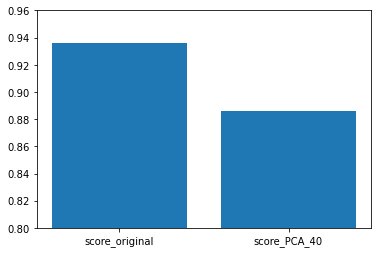

In [10]:

a=['score_original', 'score_PCA_40']
b=[score_orig,score_PCA]
plt.ylim(0.8, 0.96)
plt.bar(a,b)
plt.show()

In [12]:
model = RandomForestRegressor()

In [13]:
model.fit(x, y)

RandomForestRegressor()

In [14]:
##feature importance
importance = model.feature_importances_


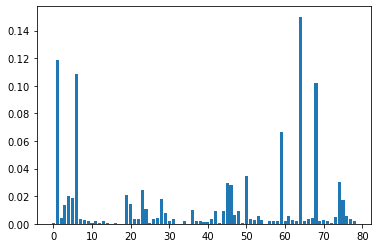

In [15]:
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [16]:
##sort importance by key in ascending order
sorted_indices = np.argsort(importance)
#39 least important features
indices_39 = sorted_indices[0:39]
print(dataset.shape)

(18982, 80)


In [17]:
#delete 39 columns
dataset.drop(dataset.columns[indices_39],axis = 1, inplace = True)
print(dataset.shape)

(18982, 41)


In [18]:
x = dataset.iloc[:, 0:40].values
y = dataset.iloc[:, 40].values
y=y.astype('int')
score_feature_40 = RF_Accuracy_score(x,y)
print(score_feature_40)

0.9323149855148801


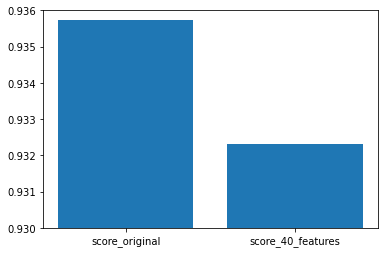

In [19]:
a=['score_original', 'score_40_features',]
b=[score_orig,score_feature_40]
plt.ylim(0.93, 0.936)
plt.bar(a,b)
plt.show()


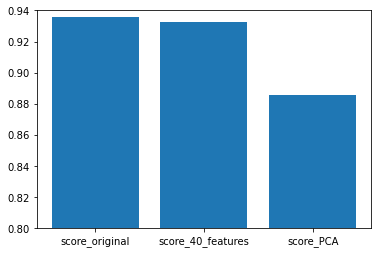

In [24]:
a=['score_original', 'score_40_features','score_PCA']
b=[score_orig,score_feature_40,score_PCA]
plt.ylim(0.8, 0.94)
plt.bar(a,b)
plt.show()

conclusion: score_orig > score_feature_40 > score_PCA
    